In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
# Importing data
df = pd.read_excel('Sample - Superstore.xls',header = 0)
# Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.shape

(9994, 21)

## Properties of TS data
1. Single diementional data -> Subset only Time & Y
2. Convert the time var as the index
3. Sort the data in chronological order
4. Equally spaced time intervals -> ressample
5. Group the data on the date var

In [3]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [4]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture.shape

(2121, 21)

In [5]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [6]:
furniture=furniture[["Order Date","Sales"]]
furniture.shape

(2121, 2)

In [7]:
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [8]:
furniture = furniture.sort_values('Order Date',ascending=True)

In [9]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [10]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [11]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [12]:
furniture = furniture.set_index('Order Date')

In [13]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [14]:
y = furniture['Sales'].resample("MS").mean()

In [15]:
print(y.shape)
y


(48,)


Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

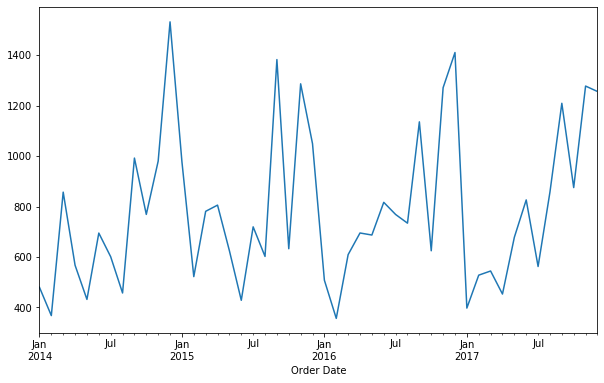

In [16]:
y.plot(figsize=(10, 6))
plt.show()

In [17]:
train=y.loc[:'2016-12-01']
train.tail()

Order Date
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

In [18]:
test=y.loc['2017-01-01':]
test.tail()

Order Date
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

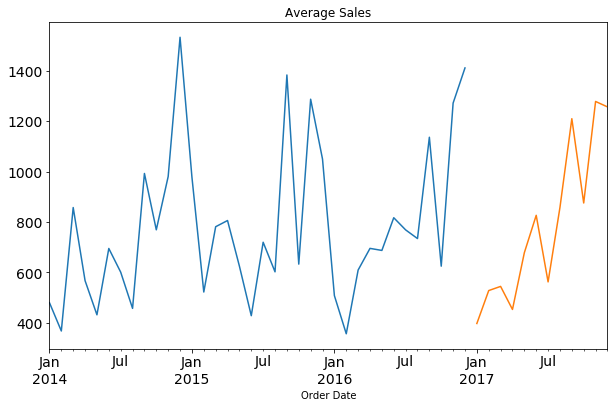

In [19]:
#Plotting data
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

## Time Series Models
1. Simple Average
    - If your values are fluctuating in a range then you can use simple average model but you will get straight line 
    - Errors are high if the data has high spikes
    - If the data has no spike then error is less
    - Not suitable for real world data
    - It does not identify trends
    
2. Rolling Average
    - When you need recent data but not the entire data for forecasting at that time you will use rolling average
    - You can decide the time window to calculate the rolling average based on how much recent data you want to consider
    - It identify trends
    
3. Exponential Smoothing
    - If you want to give importance to historical data as well but more importance to recent data then you can use Exponential Smoothing
    - It adds some weight to recent data and less weight to historical data thats how it identify the data importance which gives more accurate prediction
    
    a. Simple Exponential Smoothing - 1st Order
        - if the data has no trend and seasonality 
        - you will get a horizontal straifgt line
    
    b. Holts Linear Trends Models - 2nd Order
        - if you have trend component in data
    
    c. Holts Winter Models - 3rd Order
        - if you have trend component as well as seasonality in the data
        - you have to mention the seasonality component in the argument like how many time period is repeating 

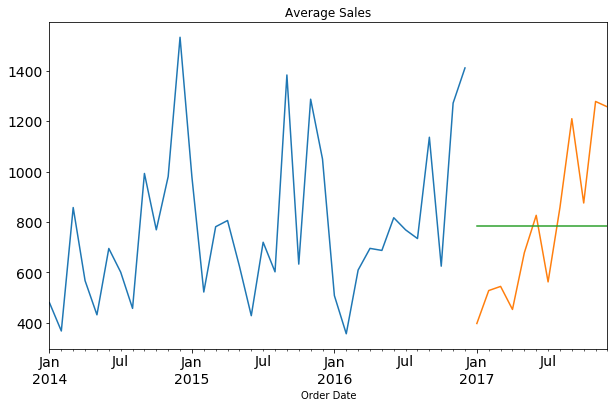

In [20]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.001) # TRY TO CHANGE VALUE FOR SMOOTHING AND SELECT THE BEST MODEL BASED ON AIC
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [21]:
# AIC is  used to compare different models with same algo but different data
# choose models with the loweset AIC value
fit1.aic

415.5942255752049

In [22]:
# RMSE is used to compare different models with same data but different models
# Choose the model with Lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rms)

303.50905859895903


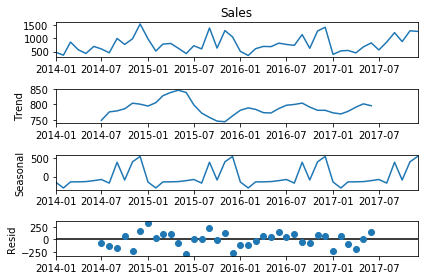

In [23]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

C:\Users\Pratik Vichare\anaconda3\Anaconda  3 new\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.


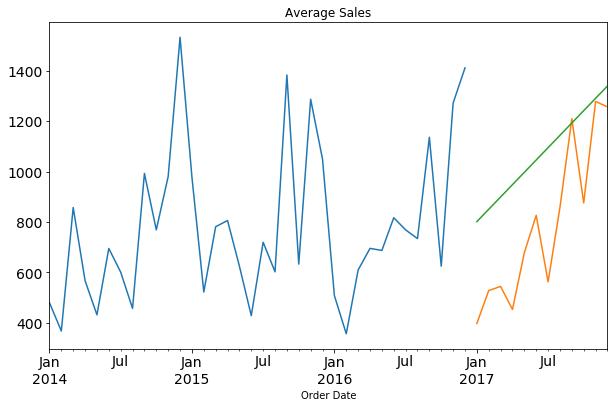

In [24]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#soothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.05,smoothing_slope = 0.75)
Holt_df['Holt_linear'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rms)

328.2798872745409


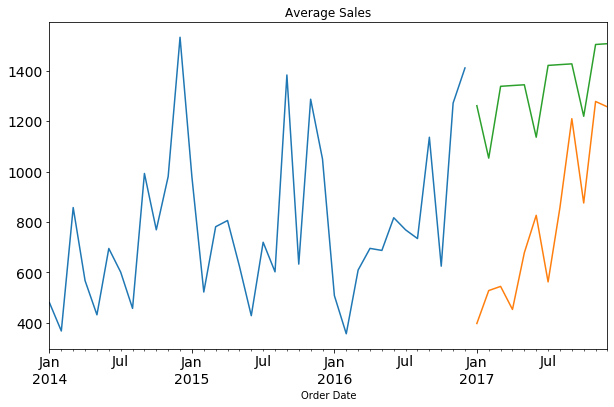

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma

# two type of trend and season component
# 1. additive: if the data is constant and not exponentially increased then use add
# 2. multiplicative : if data is not condstant and exponentially increased the use mul

fit1 = ExponentialSmoothing(train ,seasonal_periods=4,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

599.5279155221978


## ARIMA 

1. AR -> Auto Regrecive     (p stands for lag)
2. MA -> Moving Average     (q stands for error)
3. ARMA -> AR + MA          (here we use both p and q)
4. I -> Integrated          (d stands for differentiation)
5. ARIMA -> AR + I + MA (NON Seasonal) Auto Regrecive Integrated Moving Average
6. SARIMA -> seasonal data

In [28]:
import pmdarima as pm

In [29]:
model = pm.auto_arima(y,
                      start_p=0, max_p=5, 
                      d=None, 
                      max_d=2,
                      start_q=0, max_q=5,  
                      start_P=0,max_P=3, 
                      D=None, 
                      max_D=1, 
                      start_Q=0, max_Q=3,
                      max_order=10, 
                      m=12, 
                      seasonal=True, 
                      information_criterion='aic',
                      test='adf',
                      trace=True,
                      random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.09 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.08 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.04 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.09 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.05 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.09 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.33 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=0.80 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.23 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [30]:
model

ARIMA(maxiter=50, method='lbfgs', order=(3, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [31]:
model.aic()

489.41762612467494

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
                order=(3, 2, 0),seasonal_order=(1,1,0,12)).fit()


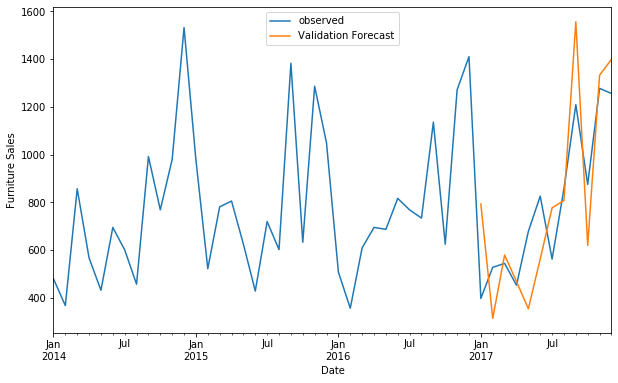

In [33]:
pred = model.get_prediction(start=pd.to_datetime('2017-01-01'))
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [34]:
pred.predicted_mean

Order Date
2017-01-01     792.949434
2017-02-01     314.265632
2017-03-01     579.803132
2017-04-01     468.932392
2017-05-01     354.687212
2017-06-01     562.948849
2017-07-01     777.172661
2017-08-01     807.929707
2017-09-01    1556.342090
2017-10-01     620.158822
2017-11-01    1332.648296
2017-12-01    1399.290959
Freq: MS, Name: predicted_mean, dtype: float64

In [35]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-01':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)


230.06285317598912


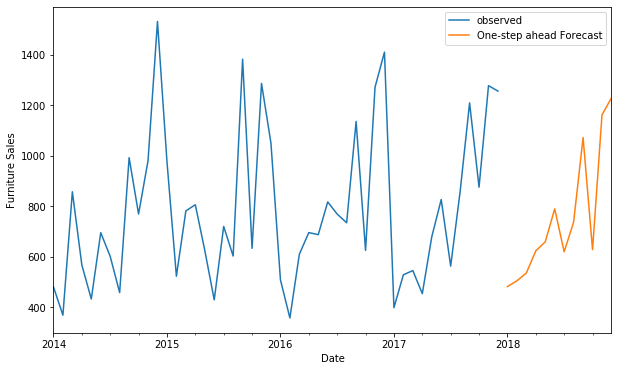

In [36]:
pred_uc = model.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [37]:
Y_predictions=pred_uc.predicted_mean
Y_predictions

2018-01-01     481.175779
2018-02-01     504.162667
2018-03-01     534.896805
2018-04-01     623.058240
2018-05-01     658.537438
2018-06-01     789.387665
2018-07-01     619.269504
2018-08-01     736.930508
2018-09-01    1072.136408
2018-10-01     627.864086
2018-11-01    1161.662873
2018-12-01    1229.291144
Freq: MS, Name: predicted_mean, dtype: float64

In [38]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx",index=True)